In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

In [2]:
# set graph size and style
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_style("whitegrid")

## Health Inequality Dataset 

This data was taken from this study https://healthinequality.org/ that aimed to measure and shed light on racial and other inequalities in healthcare, and "uses big data to measure differences in life expectancy by income across areas and identify strategies to improve health outcomes for low-income Americans." 

Find the data dictionary for the inequality file [here](https://healthinequality.org/dl/health_ineq_online_table_11_readme.pdf)

Find the data dictionary for the county file [here](https://healthinequality.org/dl/health_ineq_online_table_12_readme.pdf)

### Import the Data

In [41]:
# to run this solo, add import statement for pandas
health_inequality = pd.read_csv("https://raw.githubusercontent.com/pballent/hia_255_healthinequality/main/health_inequality_dataset.csv")
health_inequality

,cty,county_name,cty_pop2000,cz,cz_name,cz_pop2000,statename,state_id,stateabbrv,le_agg_q1_F,...,cs_educ_ba,exercise_any_q1,cs_labforce,tuition,diab_eyeexam_10,gradrate_r,cur_smoke_q4,crime_total,poor_share,cbsa
0,1001,Autauga,43671,11101,Montgomery,367927,Alabama,1,AL,79.775871,...,18.000000,0.500000,0.651493,NaN,72.419628,NaN,0.133333,0.009353,0.109228,33860.0
1,1003,Baldwin,140415,11001,Mobile,599405,Alabama,1,AL,82.847725,...,23.100000,0.599432,0.598249,2055.6699,64.047822,-0.247166,0.176991,0.007371,0.101471,19300.0
2,1005,Barbour,29038,10301,Eufaula,61458,Alabama,1,AL,83.149445,...,10.900000,0.542857,0.480174,NaN,67.556468,NaN,0.111111,0.007748,0.267998,NaN
3,1009,Blount,51024,10700,Birmingham,1038182,Alabama,1,AL,81.088120,...,9.600000,0.565217,0.605729,NaN,68.155340,NaN,0.166667,0.002019,0.117428,13820.0
4,1015,Calhoun,112249,9600,LaGrange,457299,Alabama,1,AL,79.486259,...,15.200000,0.544304,0.578343,2506.3513,62.862669,-0.034474,0.182482,0.008780,0.161113,11500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1554,56021,Laramie,81607,27702,Cheyenne,95526,Wyoming,56,WY,80.849884,...,23.400000,0.677233,0.663209,1128.0000,66.319773,-0.226124,0.135569,0.008480,0.090975,16940.0
1555,56025,Natrona,66533,34603,Casper,78585,Wyoming,56,WY,79.617317,...,20.000000,0.675015,0.682550,1248.0000,66.987620,-0.115988,0.135472,0.009649,0.118365,16220.0
1556,56029,Park,25786,34301,Cody,37247,Wyoming,56,WY,82.349632,...,23.700001,0.661082,0.640475,1128.0000,78.021978,-0.093242,0.075881,0.004305,0.127367,NaN
1557,56033,Sheridan,26560,34304,Sheridan,46306,Wyoming,56,WY,81.758583,...,22.400000,0.673342,0.661194,1128.0000,66.043614,-0.129339,0.107623,0.006739,0.107487,43260.0


In [4]:
list(health_inequality.columns)

['cty',
 'county_name',
 'cty_pop2000',
 'cz',
 'cz_name',
 'cz_pop2000',
 'statename',
 'state_id',
 'stateabbrv',
 'le_agg_q1_F',
 'le_raceadj_q1_F',
 'le_agg_q2_F',
 'le_raceadj_q2_F',
 'le_agg_q3_F',
 'le_raceadj_q3_F',
 'le_agg_q4_F',
 'le_raceadj_q4_F',
 'le_agg_q1_M',
 'le_raceadj_q1_M',
 'le_agg_q2_M',
 'le_raceadj_q2_M',
 'le_agg_q3_M',
 'le_raceadj_q3_M',
 'le_agg_q4_M',
 'le_raceadj_q4_M',
 'sd_le_agg_q1_F',
 'sd_le_raceadj_q1_F',
 'sd_le_agg_q2_F',
 'sd_le_raceadj_q2_F',
 'sd_le_agg_q3_F',
 'sd_le_raceadj_q3_F',
 'sd_le_agg_q4_F',
 'sd_le_raceadj_q4_F',
 'sd_le_agg_q1_M',
 'sd_le_raceadj_q1_M',
 'sd_le_agg_q2_M',
 'sd_le_raceadj_q2_M',
 'sd_le_agg_q3_M',
 'sd_le_raceadj_q3_M',
 'sd_le_agg_q4_M',
 'sd_le_raceadj_q4_M',
 'count_q1_F',
 'count_q2_F',
 'count_q3_F',
 'count_q4_F',
 'count_q1_M',
 'count_q2_M',
 'count_q3_M',
 'count_q4_M',
 'exercise_any_q3',
 'intersects_msa',
 'puninsured2010',
 'score_r',
 'diab_hemotest_10',
 'ccd_pup_tch_ratio',
 'exercise_any_q4',
 'cs_ra

In [5]:
health_corr = health_inequality.corr()

In [6]:
health_corr

,cty,cty_pop2000,cz,cz_pop2000,state_id,le_agg_q1_F,le_raceadj_q1_F,le_agg_q2_F,le_raceadj_q2_F,le_agg_q3_F,...,cs_educ_ba,exercise_any_q1,cs_labforce,tuition,diab_eyeexam_10,gradrate_r,cur_smoke_q4,crime_total,poor_share,cbsa
cty,1.000000,-0.090898,0.035222,-0.061654,0.999978,-0.010140,-0.015029,0.031435,0.049407,0.019723,...,-0.018286,0.002064,0.045147,0.115293,0.050403,0.063111,-0.014341,-0.241448,-0.033133,0.059581
cty_pop2000,-0.090898,1.000000,0.114573,0.569074,-0.090695,0.187997,0.082061,0.045606,-0.076568,0.016007,...,0.292102,0.082914,0.095467,0.092430,0.033351,0.026260,-0.023577,0.098164,-0.043324,0.035505
cz,0.035222,0.114573,1.000000,0.097413,0.035473,0.216929,-0.054778,0.129627,-0.068577,0.133258,...,0.171722,0.266510,0.091136,-0.101669,0.095199,-0.044003,-0.117156,-0.005706,-0.066981,0.051728
cz_pop2000,-0.061654,0.569074,0.097413,1.000000,-0.061553,0.195168,0.102571,0.034982,-0.069831,-0.011024,...,0.334348,0.075058,0.181366,0.141516,0.022156,-0.026899,-0.000846,-0.020887,-0.226765,0.046675
state_id,0.999978,-0.090695,0.035473,-0.061553,1.000000,-0.009341,-0.014191,0.032177,0.050283,0.020572,...,-0.017980,0.003043,0.045318,0.115689,0.050822,0.063164,-0.014623,-0.241809,-0.033858,0.059239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
gradrate_r,0.063111,0.026260,-0.044003,-0.026899,0.063164,0.057065,0.104433,0.126975,0.173407,0.222320,...,0.282036,0.131431,0.171111,0.449657,0.188605,1.000000,-0.101764,-0.154002,-0.058205,0.031331
cur_smoke_q4,-0.014341,-0.023577,-0.117156,-0.000846,-0.014623,-0.161161,-0.124741,-0.144359,-0.108718,-0.143174,...,-0.208587,-0.117962,-0.085934,0.017012,-0.167591,-0.101764,1.000000,0.019440,0.003458,0.000658
crime_total,-0.241448,0.098164,-0.005706,-0.020887,-0.241809,-0.099001,-0.072431,-0.186953,-0.190350,-0.176086,...,-0.010937,-0.047154,-0.120860,-0.206284,-0.070813,-0.154002,0.019440,1.000000,0.297395,-0.014660
poor_share,-0.033133,-0.043324,-0.066981,-0.226765,-0.033858,-0.015512,-0.018840,-0.141070,-0.173246,-0.230541,...,-0.322158,-0.179980,-0.681892,-0.306986,-0.357146,-0.058205,0.003458,0.297395,1.000000,-0.002972


<AxesSubplot:>

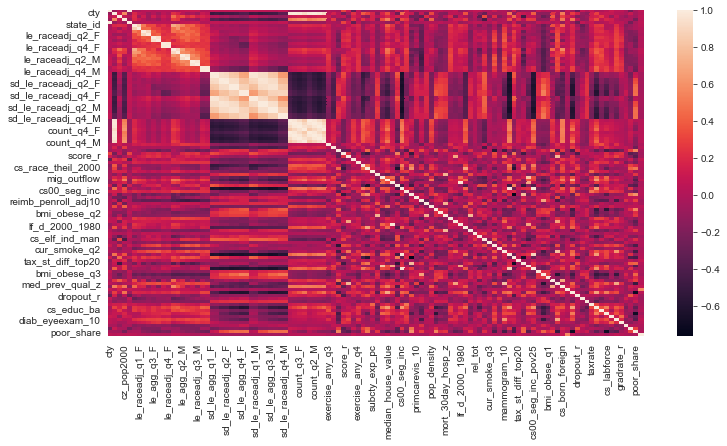

In [7]:
sns.heatmap(health_inequality.corr())

In [8]:

# top 25 variables with highest correlation to this variable
health_corr_sorted = health_corr.sort_values(by='le_raceadj_q2_M', ascending=False)[:25].reset_index()

# top 15 variables with highest *negative* correlation to this variable
health_corr_sorted_asc = health_corr.sort_values(by='le_raceadj_q2_M', ascending=True)[:15].reset_index()

In [9]:
health_corr_sorted_top25 = list(health_corr_sorted['index'])
health_corr_sorted_top25 = [i for i in health_corr_sorted_top25 if "le_" not in i] # remove other life expectancy vars
health_corr_sorted_top25.append("le_raceadj_q2_M")

In [10]:
health_corr_sorted_bottom25 = list(health_corr_sorted_asc['index'])
health_corr_sorted_bottom25 = [i for i in health_corr_sorted_bottom25 if "le_" not in i]
health_corr_sorted_bottom25.append("le_raceadj_q2_M")

<AxesSubplot:>

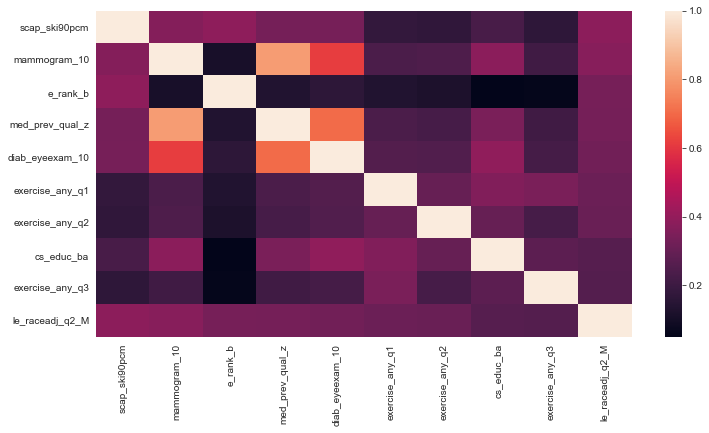

In [11]:
sns.heatmap(health_inequality[health_corr_sorted_top25].corr())

<AxesSubplot:>

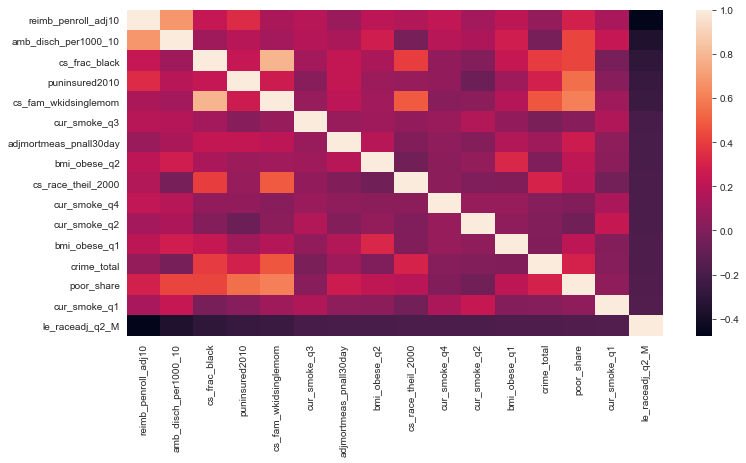

In [12]:
sns.heatmap(health_inequality[health_corr_sorted_bottom25].corr())

In [13]:
health_inequality[health_corr_sorted_bottom25].corr()['le_raceadj_q2_M'] #tabular view

reimb_penroll_adj10      -0.478586
amb_disch_per1000_10     -0.356087
cs_frac_black            -0.295128
puninsured2010           -0.264552
cs_fam_wkidsinglemom     -0.251140
cur_smoke_q3             -0.199842
adjmortmeas_pnall30day   -0.192953
bmi_obese_q2             -0.191648
cs_race_theil_2000       -0.187763
cur_smoke_q4             -0.187470
cur_smoke_q2             -0.186506
bmi_obese_q1             -0.177114
crime_total              -0.176509
poor_share               -0.170982
cur_smoke_q1             -0.162985
le_raceadj_q2_M           1.000000
Name: le_raceadj_q2_M, dtype: float64

In [14]:
health_inequality[health_corr_sorted_top25].corr()['le_raceadj_q2_M']

scap_ski90pcm      0.387925
mammogram_10       0.376594
e_rank_b           0.339181
med_prev_qual_z    0.333196
diab_eyeexam_10    0.328003
exercise_any_q1    0.310448
exercise_any_q2    0.307201
cs_educ_ba         0.263193
exercise_any_q3    0.258475
le_raceadj_q2_M    1.000000
Name: le_raceadj_q2_M, dtype: float64

In [15]:
# transform variable to be in thousands of dollars 
health_inequality['reimb_penroll_adj10'] = health_inequality['reimb_penroll_adj10']/1000

<AxesSubplot:title={'center':'Male Race Adjusted Life Expectancy (Q2) vs. Medicare $ Per Enrollee'}, xlabel='reimb_penroll_adj10', ylabel='le_raceadj_q2_M'>

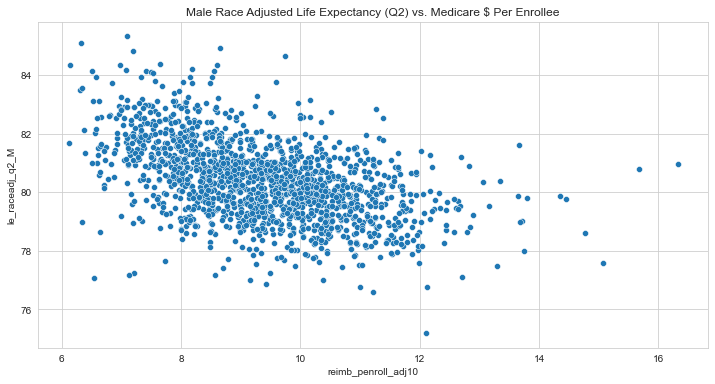

In [16]:
plt.title("Male Race Adjusted Life Expectancy (Q2) vs. Medicare $ Per Enrollee")
g = sns.scatterplot(x="reimb_penroll_adj10",y="le_raceadj_q2_M", data=health_inequality)

g

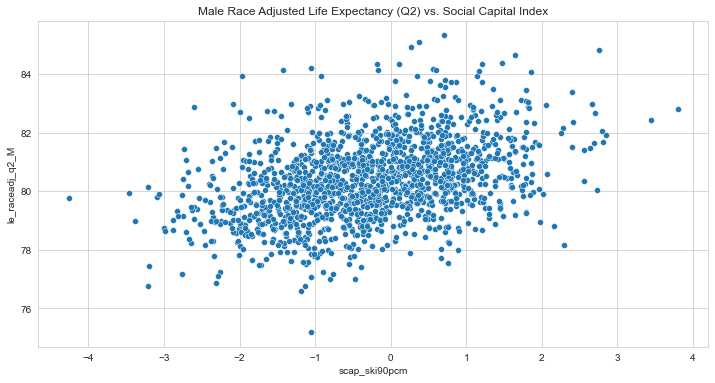

In [42]:
plt.title("Male Race Adjusted Life Expectancy (Q2) vs. Social Capital Index")
g = sns.scatterplot(x="scap_ski90pcm",y="le_raceadj_q2_M", data=health_inequality)



## Ordinary Least Squares Regression with One Variable

In [18]:
# returning an object lets us store results if we want
def multivariable_ols(formulatxt, df):
    mod = smf.ols(formula=formulatxt , data=df, missing='drop')
    res = mod.fit()
    print(res.summary())
    return res 

In [19]:
multivariable_ols("le_raceadj_q2_M ~ reimb_penroll_adj10 + puninsured2010", health_inequality)

                            OLS Regression Results                            
Dep. Variable:        le_raceadj_q2_M   R-squared:                       0.241
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     246.8
Date:                Tue, 22 Feb 2022   Prob (F-statistic):           7.92e-94
Time:                        16:19:32   Log-Likelihood:                -2445.2
No. Observations:                1559   AIC:                             4896.
Df Residuals:                    1556   BIC:                             4913.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              84.7450    

## Ordinary Least Squares Regression with >1 Variable

In [20]:
multivariable_ols("le_raceadj_q2_M ~ reimb_penroll_adj10 + scap_ski90pcm", health_inequality)

                            OLS Regression Results                            
Dep. Variable:        le_raceadj_q2_M   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     302.1
Date:                Tue, 22 Feb 2022   Prob (F-statistic):          1.80e-111
Time:                        16:19:32   Log-Likelihood:                -2391.2
No. Observations:                1550   AIC:                             4788.
Df Residuals:                    1547   BIC:                             4805.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              83.9134    

## Logistic Regression with Dichotomous Variables

### Generate dichotomous variables from continuous

In [21]:
def get_top_quantile_from_df(column_name, df):
    pandas_series = df['{0}'.format(column_name)]
    top_quantile = pandas_series.quantile(q=0.9)
    return top_quantile

In [22]:
def return_dichotomous(x, threshold):
    if x >= threshold:
        return 1
    else:
        return 0 

In [23]:
def make_dichotomous_top_quantile(column_name, df):
    col_threshold = get_top_quantile_from_df(column_name, df)
    df['dichot_top_quant_{0}'.format(column_name)] = df['{0}'.format(column_name)].apply(lambda x: return_dichotomous(x, col_threshold))
    print('dichot_top_quant_{0} has been created'.format(column_name))

In [24]:
make_dichotomous_top_quantile('le_raceadj_q2_M', health_inequality)

dichot_top_quant_le_raceadj_q2_M has been created


In [25]:
make_dichotomous_top_quantile('reimb_penroll_adj10', health_inequality)

dichot_top_quant_reimb_penroll_adj10 has been created


In [26]:
make_dichotomous_top_quantile('puninsured2010', health_inequality)

dichot_top_quant_puninsured2010 has been created


In [27]:
## Examine value counts to see if roughly 10% of data has been labeled as being in the top quantile (10%)

In [28]:
health_inequality['dichot_top_quant_le_raceadj_q2_M'].value_counts()

0    1403
1     156
Name: dichot_top_quant_le_raceadj_q2_M, dtype: int64

In [29]:
health_inequality['dichot_top_quant_reimb_penroll_adj10'].value_counts()

0    1403
1     156
Name: dichot_top_quant_reimb_penroll_adj10, dtype: int64

### Logistic Regression with One Binary Predictor Variable

In [30]:
# Inspired by the workbook here http://www.science.smith.edu/~jcrouser/SDS293/labs/lab4-py.html 

def logistic_regression(formulatxt, df):
    mod = smf.glm(formula=formulatxt , data=df, missing='drop', family=sm.families.Binomial())
    res = mod.fit()
    print(res.summary())
    print("\n\n\nOdds Ratio Metrics:")
    params = res.params
    conf = res.conf_int()
    conf['Odds Ratio'] = params
    conf.columns = ['5%', '95%', 'Odds Ratio']
    print(np.exp(conf))
    return res

# This function both PRINTS results and RETURNS an object that is the actual model itself (res)

In [31]:
lr_res = logistic_regression('dichot_top_quant_le_raceadj_q2_M ~ dichot_top_quant_reimb_penroll_adj10', health_inequality)

                        Generalized Linear Model Regression Results                         
Dep. Variable:     dichot_top_quant_le_raceadj_q2_M   No. Observations:                 1559
Model:                                          GLM   Df Residuals:                     1557
Model Family:                              Binomial   Df Model:                            1
Link Function:                                logit   Scale:                          1.0000
Method:                                        IRLS   Log-Likelihood:                -496.17
Date:                              Tue, 22 Feb 2022   Deviance:                       992.34
Time:                                      16:19:33   Pearson chi2:                 1.56e+03
No. Iterations:                                   7                                         
Covariance Type:                          nonrobust                                         
                                           coef    std err          z 

In [32]:
# Access an object's specific attribute 
lr_res.params

Intercept                              -2.093146
dichot_top_quant_reimb_penroll_adj10   -2.250660
dtype: float64

In [33]:
# Access an object's specific attribute 
lr_res.pvalues

Intercept                               1.206459e-132
dichot_top_quant_reimb_penroll_adj10     1.689951e-03
dtype: float64

In [34]:
# view all info about an object
help(lr_res)

Help on GLMResultsWrapper in module statsmodels.genmod.generalized_linear_model object:

class GLMResultsWrapper(statsmodels.regression.linear_model.RegressionResultsWrapper)
 |  GLMResultsWrapper(results)
 |  
 |  Class which wraps a statsmodels estimation Results class and steps in to
 |  reattach metadata to results (if available)
 |  
 |  Method resolution order:
 |      GLMResultsWrapper
 |      statsmodels.regression.linear_model.RegressionResultsWrapper
 |      statsmodels.base.wrapper.ResultsWrapper
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  conf_int(self, alpha=0.05, cols=None)
 |      conf_int(self, alpha=0.05, cols=None)
 |      
 |      Construct confidence interval for the fitted parameters.
 |      
 |      Parameters
 |      ----------
 |      alpha : float, optional
 |          The significance level for the confidence interval. The default
 |          `alpha` = .05 returns a 95% confidence interval.
 |      cols : array_like, optional
 |          S

### Logistic Regression with Two Predictor Variables

In [35]:
lr_res_mv = logistic_regression('dichot_top_quant_le_raceadj_q2_M ~ dichot_top_quant_reimb_penroll_adj10 + dichot_top_quant_puninsured2010', health_inequality)

                        Generalized Linear Model Regression Results                         
Dep. Variable:     dichot_top_quant_le_raceadj_q2_M   No. Observations:                 1559
Model:                                          GLM   Df Residuals:                     1556
Model Family:                              Binomial   Df Model:                            2
Link Function:                                logit   Scale:                          1.0000
Method:                                        IRLS   Log-Likelihood:                -495.59
Date:                              Tue, 22 Feb 2022   Deviance:                       991.18
Time:                                      16:19:33   Pearson chi2:                 1.55e+03
No. Iterations:                                   7                                         
Covariance Type:                          nonrobust                                         
                                           coef    std err          z 

In [36]:
lr_res_mv.params

Intercept                              -2.068698
dichot_top_quant_reimb_penroll_adj10   -2.170341
dichot_top_quant_puninsured2010        -0.370200
dtype: float64

In [37]:
lr_res_mv.scale

1.0

### Interpret the Probability from Logistic Regression Results

In [38]:
import math 

def interpret_log_params(coeff):
    probability = (1 / (1 + (math.e**(-1 * coeff))))
    return ("The probability predicted by the model is {0:.4} percent".format(100*probability))

In [39]:
# Probability predicted for overall counties to be in top quantile of male race adjusted life expectancy
interpret_log_params(-2.068698)

'The probability predicted by the model is 11.22 percent'

In [40]:
# Probability predicted for overall counties to be in top quantile of male race adjusted life expectancy 
# when a county is in the top quantile of medicare reimbursement per person and  
# is in the top quantile of percent uninsured in 2010

interpret_log_params(-2.170341+-2.068698+-0.370200)

'The probability predicted by the model is 0.9861 percent'